In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols 
import statsmodels.api as sm

In [2]:
mtcars =pd.read_csv("mtcars.csv")

In [3]:
mtcars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
x= mtcars.drop(["model"],axis=1)

In [6]:
x.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


<AxesSubplot:>

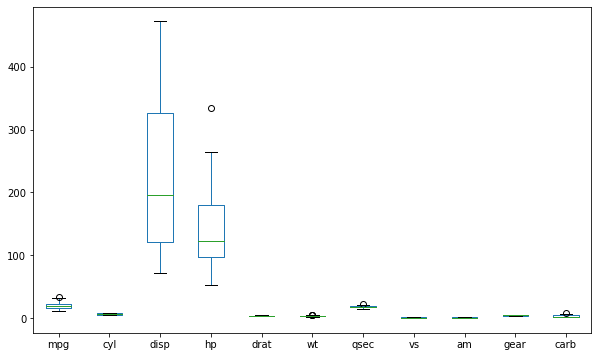

In [32]:
x.boxplot(grid=False)

C:\Users\lui_s\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

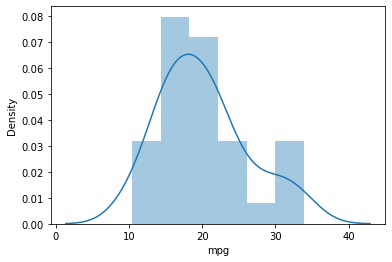

In [9]:
sns.distplot(x["mpg"])

In [10]:

corr = mtcars.corr()
corr.shape

(11, 11)

<AxesSubplot:>

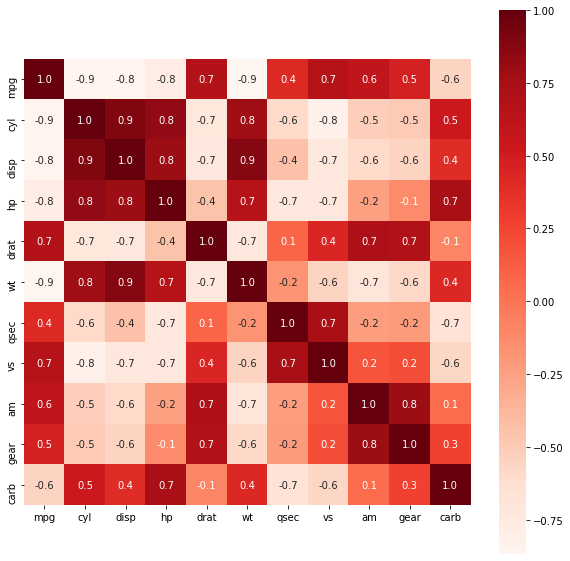

In [11]:

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')


In [12]:
print(x.columns)

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


In [13]:
# Primer modelo usando todas las variables

#formula.api.ols hace intercepto automaticamente
#modelo1
estimator = ols(formula='mpg ~cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb', data=x)
trained_estimator = estimator.fit()

In [14]:
#Coeficientes
trained_estimator.params

Intercept    12.303374
cyl          -0.111440
disp          0.013335
hp           -0.021482
drat          0.787111
wt           -3.715304
qsec          0.821041
vs            0.317763
am            2.520227
gear          0.655413
carb         -0.199419
dtype: float64

In [15]:
#Resumen
print(trained_estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.79e-07
Time:                        09:06:50   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

In [16]:
# Segundo modelo usando una sola variable wt(weight o peso)

#formula.api.ols hace intercepto automaticamente
#modelo1
estimator = ols(formula='mpg ~ wt', data=x)
trained_estimator = estimator.fit()

In [17]:
#Coeficientes
trained_estimator.params

Intercept    37.285126
wt           -5.344472
dtype: float64

In [18]:
#Resumen
print(trained_estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.29e-10
Time:                        09:06:50   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.0

In [19]:
#Prediciones del modelo
predictions = trained_estimator.predict(x["wt"])
print(predictions)

0     23.282611
1     21.919770
2     24.885952
3     20.102650
4     18.900144
5     18.793255
6     18.205363
7     20.236262
8     20.450041
9     18.900144
10    18.900144
11    15.533127
12    17.350247
13    17.083024
14     9.226650
15     8.296712
16     8.718926
17    25.527289
18    28.653805
19    27.478021
20    24.111004
21    18.472586
22    18.926866
23    16.762355
24    16.735633
25    26.943574
26    25.847957
27    29.198941
28    20.343151
29    22.480940
30    18.205363
31    22.427495
dtype: float64


In [20]:
Comp = mtcars[["wt","mpg"]]

In [21]:
Comp["predictions"]=predictions

<ipython-input-21-175c70e53b1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp["predictions"]=predictions


In [22]:
desviacion=Comp["mpg"]-Comp["predictions"]

In [23]:
Comp["desviacion"]=desviacion

<ipython-input-23-aed3a85a3b13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp["desviacion"]=desviacion


In [24]:
Comp.head(10)

,wt,mpg,predictions,desviacion
0,2.620,21.0,23.282611,-2.282611
1,2.875,21.0,21.919770,-0.919770
2,2.320,22.8,24.885952,-2.085952
3,3.215,21.4,20.102650,1.297350
4,3.440,18.7,18.900144,-0.200144
5,3.460,18.1,18.793255,-0.693255
6,3.570,14.3,18.205363,-3.905363
7,3.190,24.4,20.236262,4.163738
8,3.150,22.8,20.450041,2.349959
9,3.440,19.2,18.900144,0.299856


In [25]:
Comp.to_csv("mtcarspredictions.csv") 

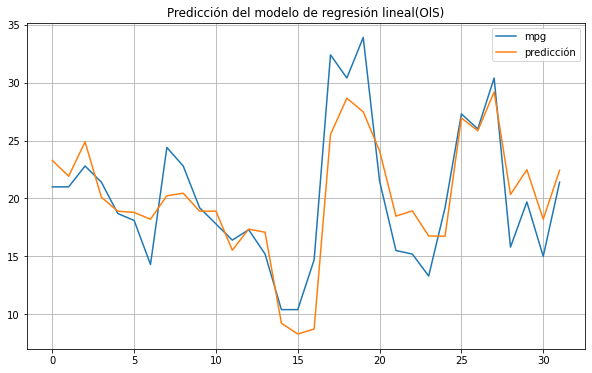

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
plt.plot(Comp.mpg)
plt.plot(Comp.predictions)
plt.title("Predicción del modelo de regresión lineal(OlS)")
plt.legend(['mpg','predicción'])
plt.grid(True)
plt.show()

C:\Users\lui_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg', ylabel='wt'>

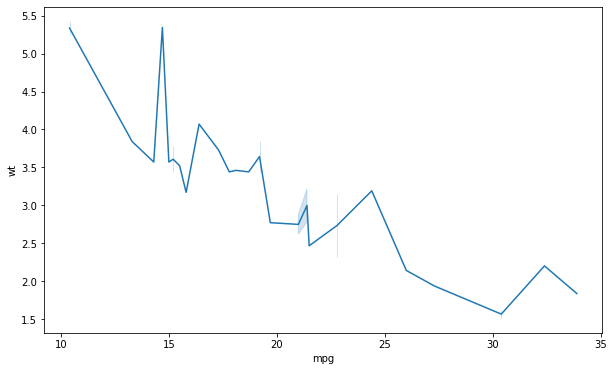

In [27]:
sns.lineplot('mpg', 'wt', data=Comp)

In [28]:
# Segundo modelo usando una sola variable wt(weight o peso)

#formula.api.ols hace intercepto automaticamente
#modelo1 
estimator = ols(formula='mpg ~ am', data=x)
trained_estimator = estimator.fit()

In [29]:
#Coeficientes
trained_estimator.params

Intercept    17.147368
am            7.244939
dtype: float64

In [30]:
#Resumen
print(trained_estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     16.86
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           0.000285
Time:                        09:07:33   Log-Likelihood:                -95.242
No. Observations:                  32   AIC:                             194.5
Df Residuals:                      30   BIC:                             197.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1474      1.125     15.247      0.0